# Lab: H2O AutoMl

NOTE: This notebook should be run in AWS SageMaker python environment.

Import dependencies

In [1]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 2.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693426 sha256=a76ca0ea37803a113fbef5fa543c8e5b124a7f9d06203a73ee36309744d227de
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3e/0a/9f/03973c2b019d5d7d2d87fbf77151c3633601c63bbc3a8ab1f7
Successfully built h2o


In [2]:
%pip install --upgrade boto3

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 kB 2.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 35.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.71
    Uninstalling botocore-1.29.71:
      Successfully uninstalled botocore-1.29.71
  Attempting uninstall: boto3
    Found existing installation: boto3 1.26.71
    Uninstalling boto3-1.26.71:
      Successfully uninstalled boto3-1.26.71
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.27.71 requires botocore==1.29.71, but you have botocore 1.29.97 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import h2o
from h2o.automl import H2OAutoML
import boto3

Start H2O cluster

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_352"; OpenJDK Runtime Environment (build 1.8.0_352-b08); OpenJDK 64-Bit Server VM (build 25.352-b08, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8p4q8d0g
  JVM stdout: /tmp/tmp8p4q8d0g/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmp8p4q8d0g/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_ec2_user_csprti
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,852 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Load `sports_classification.csv` dataset

In [14]:
import os

DATASET = 'sports_classification.csv'
DATA_FOLDER = 's3://bah-data'

data = h2o.import_file(os.path.join(DATA_FOLDER, DATASET))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Prepare the data and split the dataset into train/test

In [15]:
data.head(5)

long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,sport
1,11.8,6.1,1,0,1,1,football
0,14,5.4,0,0,1,0,futbol
0,11.8,6.3,1,1,1,1,football
0,14.4,6.1,0,1,1,1,football
1,13.5,5.9,0,0,0,0,futbol


In [7]:
train, test = data.split_frame(ratios=[.75])

In [8]:
x_columns = train.columns
target_column = "sport"

Train the model using H2OAutoML 

In [9]:
number_of_models = 2

In [10]:
aml = H2OAutoML(max_models=number_of_models, seed=1)
aml.train(x=x_columns, y=target_column, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230323_94256


GLM Model: summary
    family    link    regularization               lambda_search                                                                    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  -------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    binomial  logit   Ridge ( lambda = 2.554E-4 )  nlambda = 30, lambda.max = 37.983, lambda.min = 2.554E-4, lambda.1se = 0.002765  7                             7                              61                      AutoML_1_20230323_94256_training_py_3_sid_bc82

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.021568644361034738
RMSE: 0.14686267177548806
LogLoss: 0.07378251996184299
AUC: 0.9965506357587736
AUCPR: 0.9964844254336335
Gini: 0.9931012715175471
Null degrees of freedom: 3753
Residual degrees of freedom: 3746
Null deviance: 5204.131983149525
Residual deviance: 553.9591598735171
AIC: 569.9591598735171

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3999571017088923
          football    futbol    Error    Rate
--------  ----------  --------  -------  --------------
football  1810        71        0.0377   (71.0/1881.0)
futbol    39          1834      0.0208   (39.0/1873.0)
Total     1849        1905      0.0293   (110.0/3754.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.399957     0.970884  216
max f2                       0.204307     0.981313  271
max f0point5                 0.8724       0.978616  105
max accuracy                 0.399957     0.970698  216
max precision                0.999871     1         0
max recall                   0.00805757   1         377
max specificity              0.999871     1         0
max absolute_mcc             0.399957     0.941535  216
max min_per_class_accuracy   0.495624     0.9685    195
max mean_per_class_accuracy  0.399957     0.970716  216
max tns                      0.999871     1881      0
max fns                      0.999871     1615      0
max fps                      7.2413e-05   1881      399
max tps                      0.00805757   1873      377
max tnr                      0.999871     1         0
max fnr                      0.999871     0.862253  0
max fpr                      7.2413e-05   1         399
max tpr                      0.00805757   1         377

Gains/Lift Table: Avg response rate: 49.89 %, avg score: 49.89 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101225                   0.999911           2.00427     2.00427            1                0.999924     1                           0.999924            0.0202883       0.0202883                  100.427   100.427            0.0202883
2        0.0205115                   0.999894           2.00427     2.00427            1                0.999901     1                           0.999912            0.0208222       0.0411105                  100.427   100.427            0.0411105
3        0.0311668                   0.999879           2.00427     2.00427            1                0.999885     1        

In [11]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20230323_94256,0.996296,0.0760353,0.99619,0.0314083,0.149205,0.0222621
StackedEnsemble_BestOfFamily_1_AutoML_1_20230323_94256,0.996188,0.0753255,0.995989,0.029534,0.148097,0.0219326
XGBoost_1_AutoML_1_20230323_94256,0.996142,0.0755023,0.995937,0.0292659,0.148335,0.0220032


Select the best model using `AUC` criteria

In [12]:
best_model_with_auc = aml.get_best_model(criterion="auc")

Explain the best model with `explain` from H2O

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20230323_94256

,football,futbol,Error,Rate
football,588.0,31.0,0.0501,(31.0/619.0)
futbol,6.0,622.0,0.0096,(6.0/628.0)
Total,594.0,653.0,0.0297,(37.0/1247.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

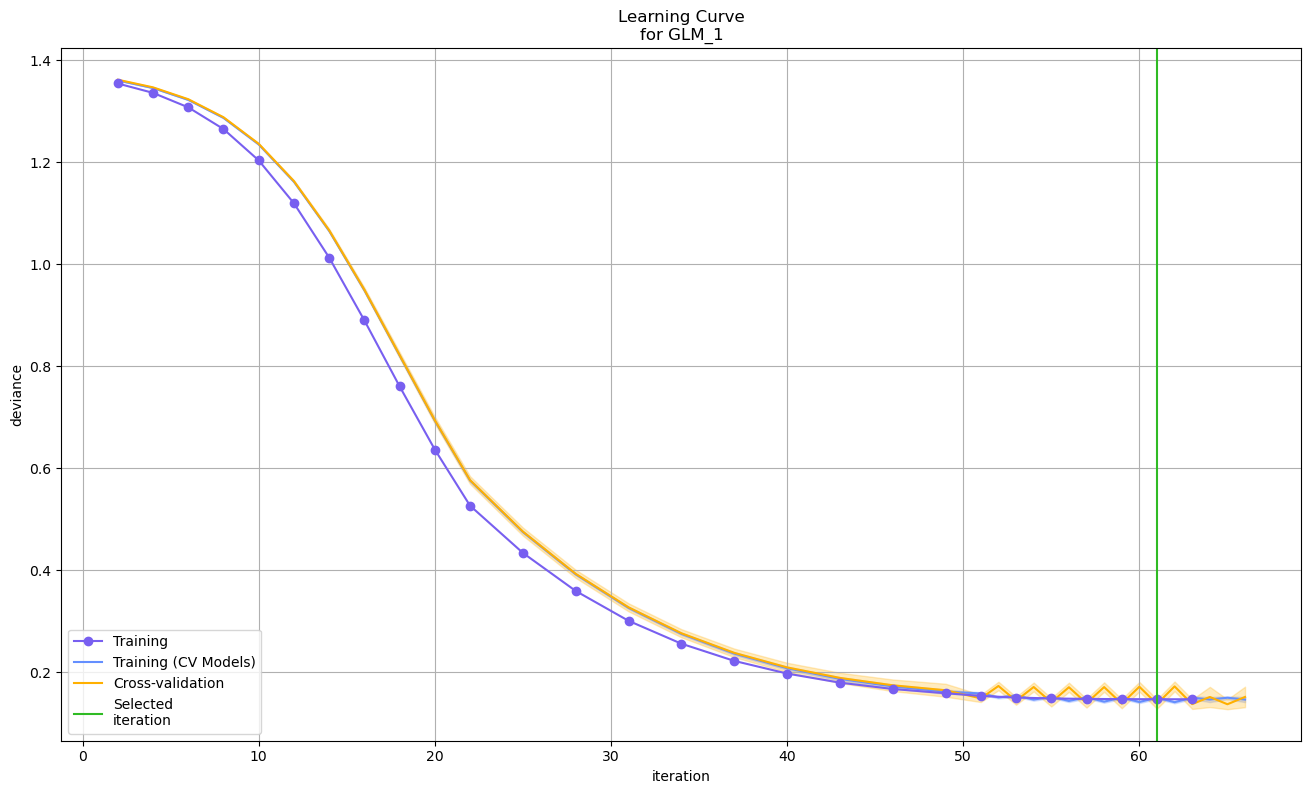

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

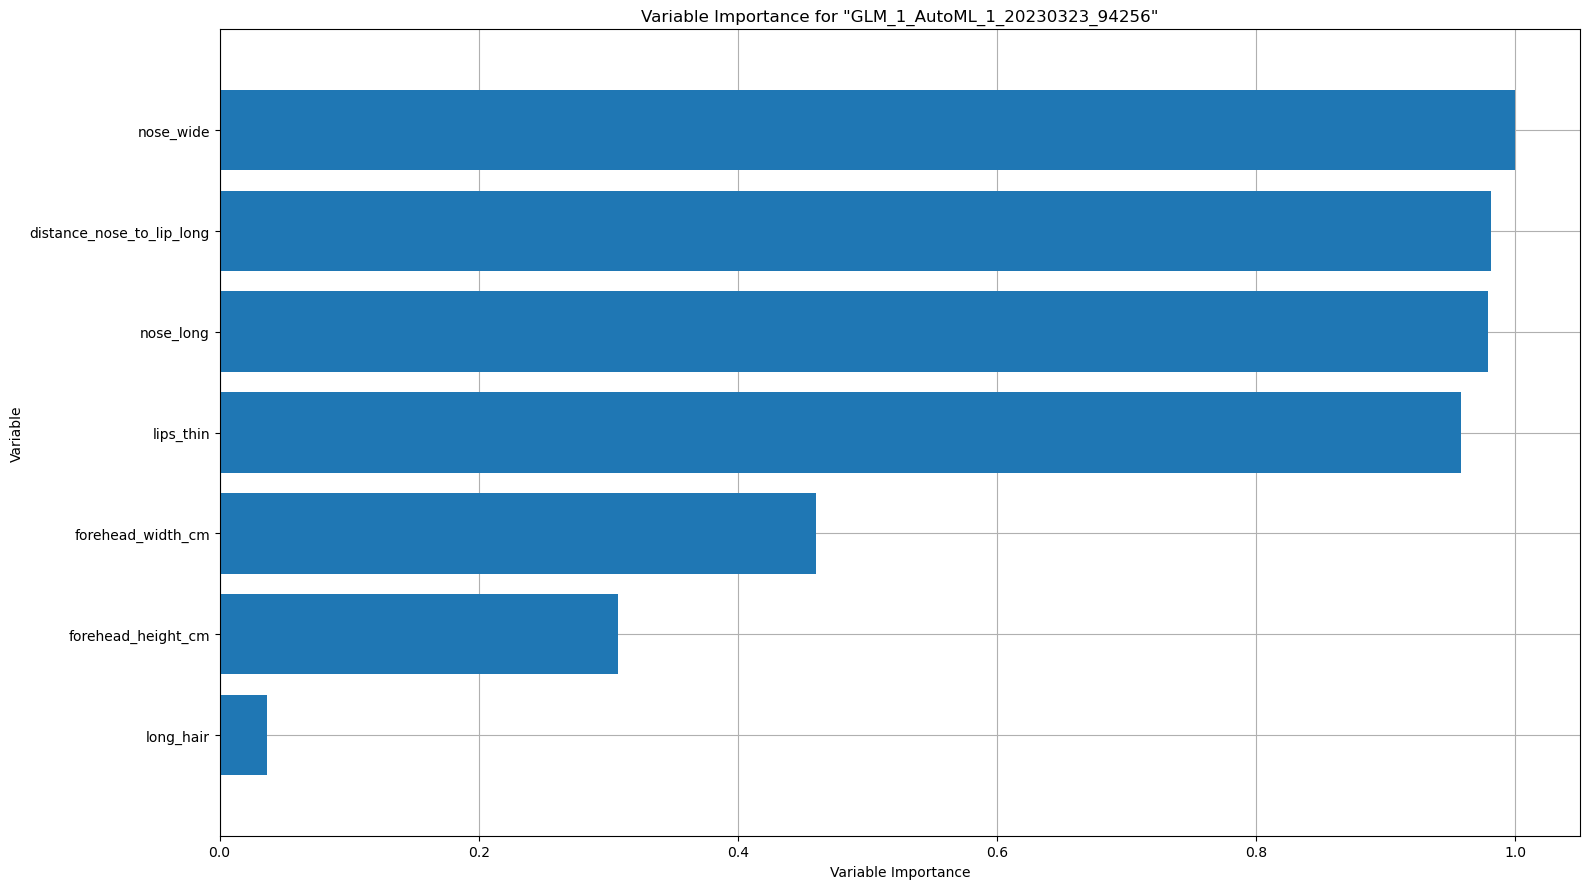

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

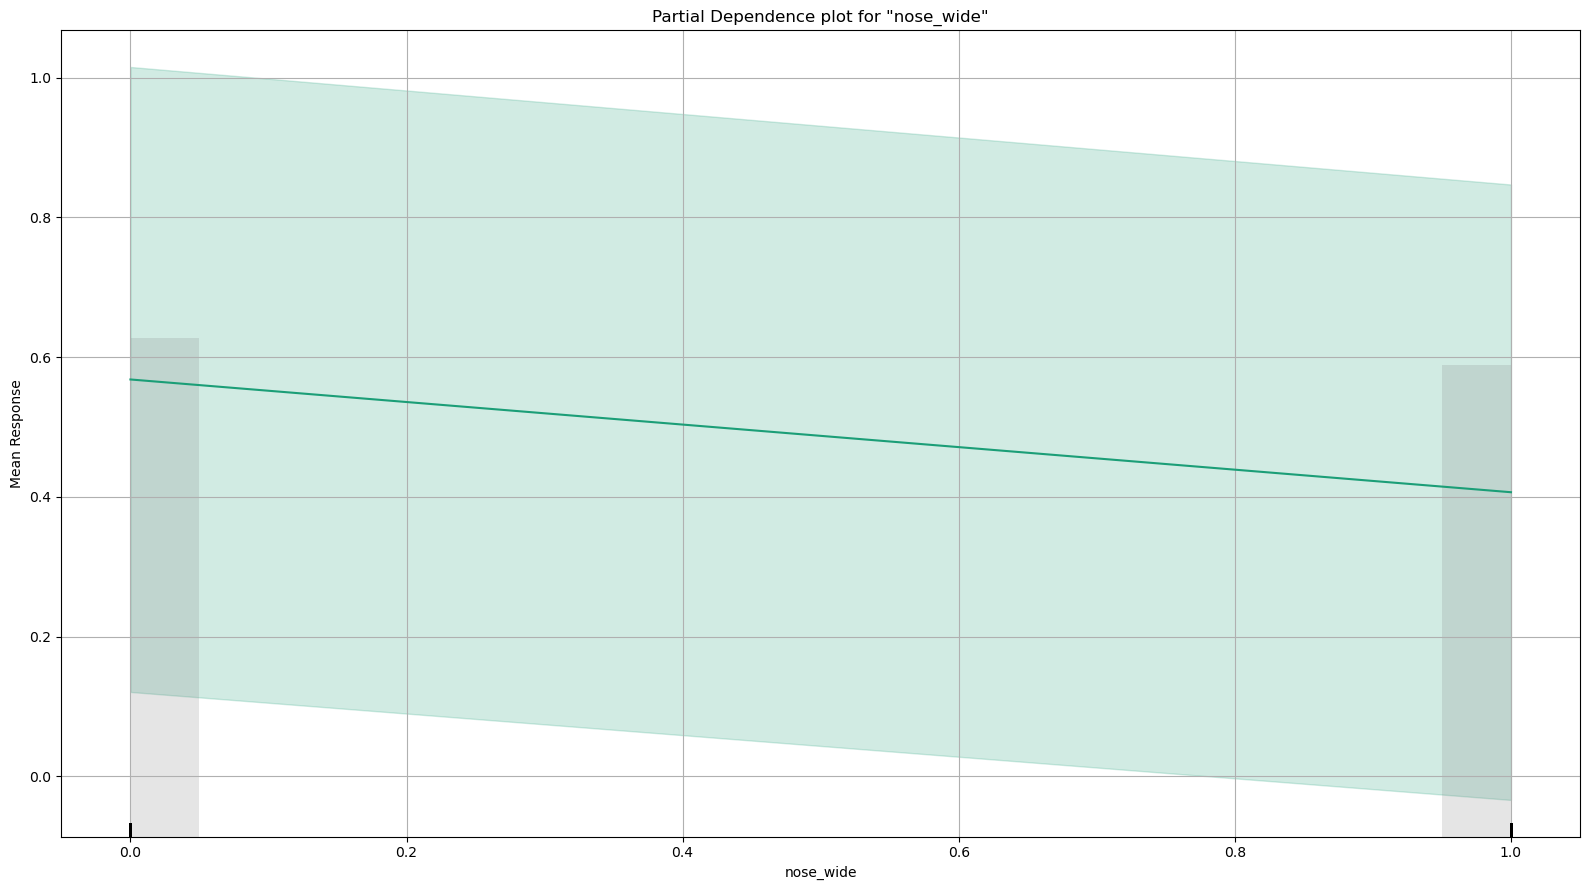

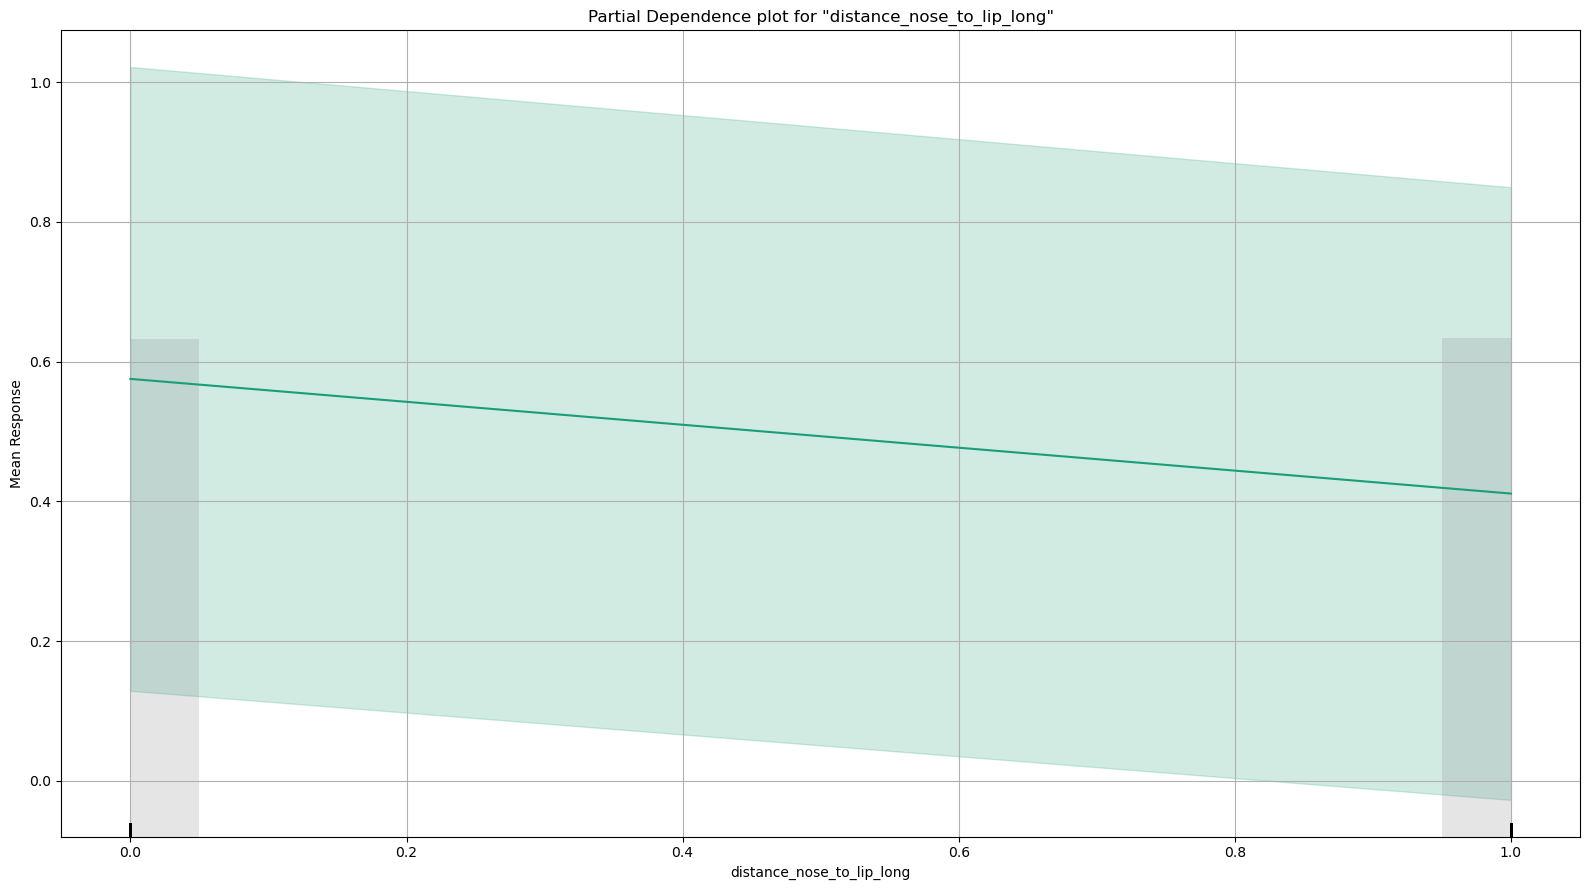

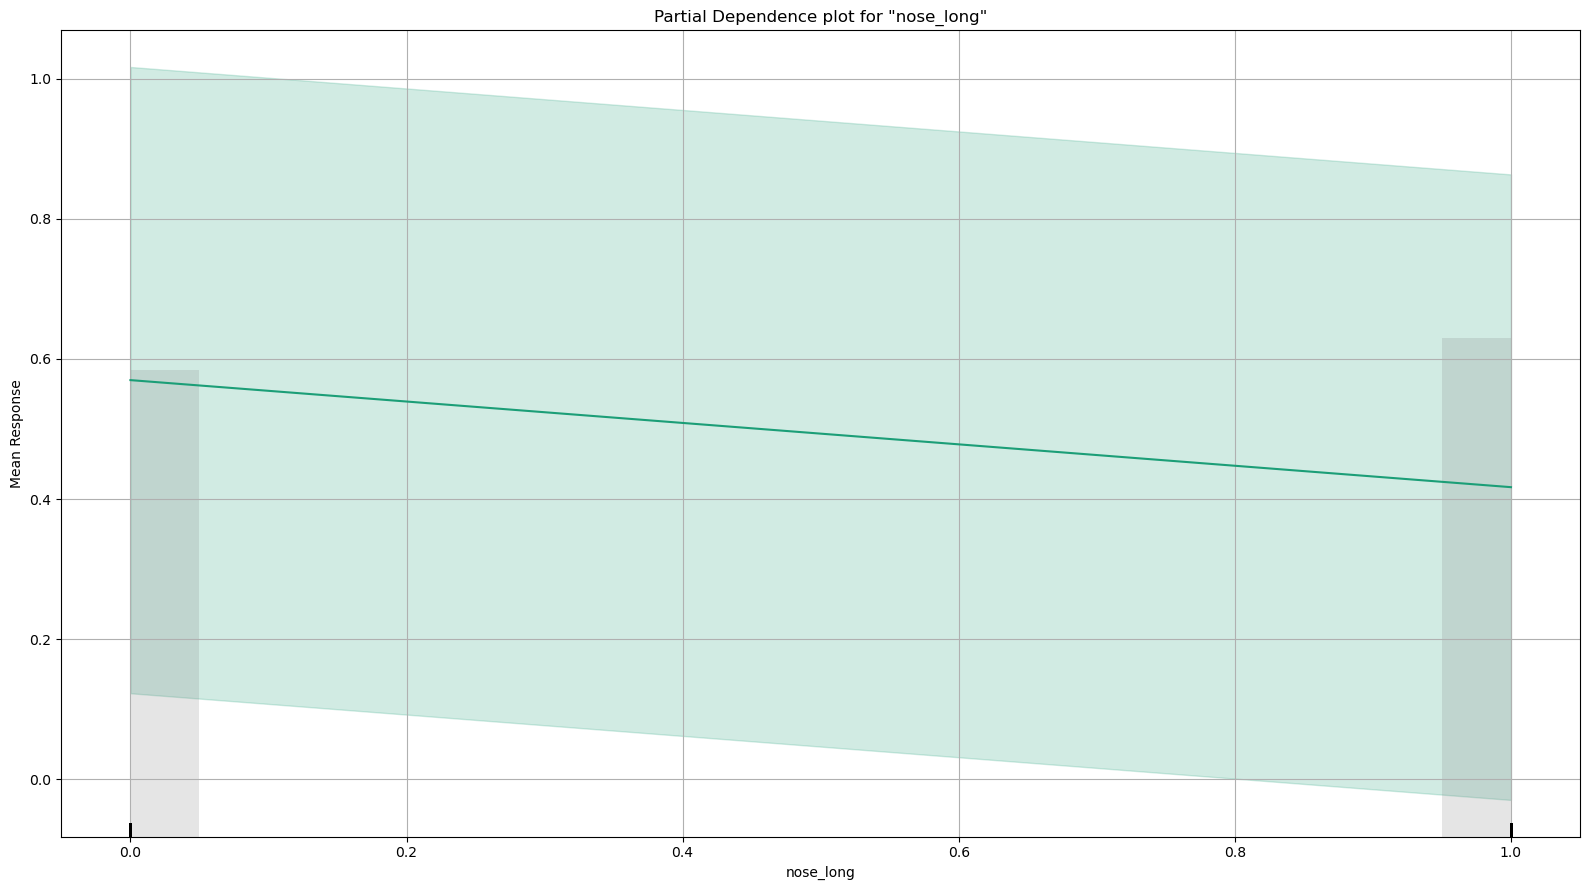

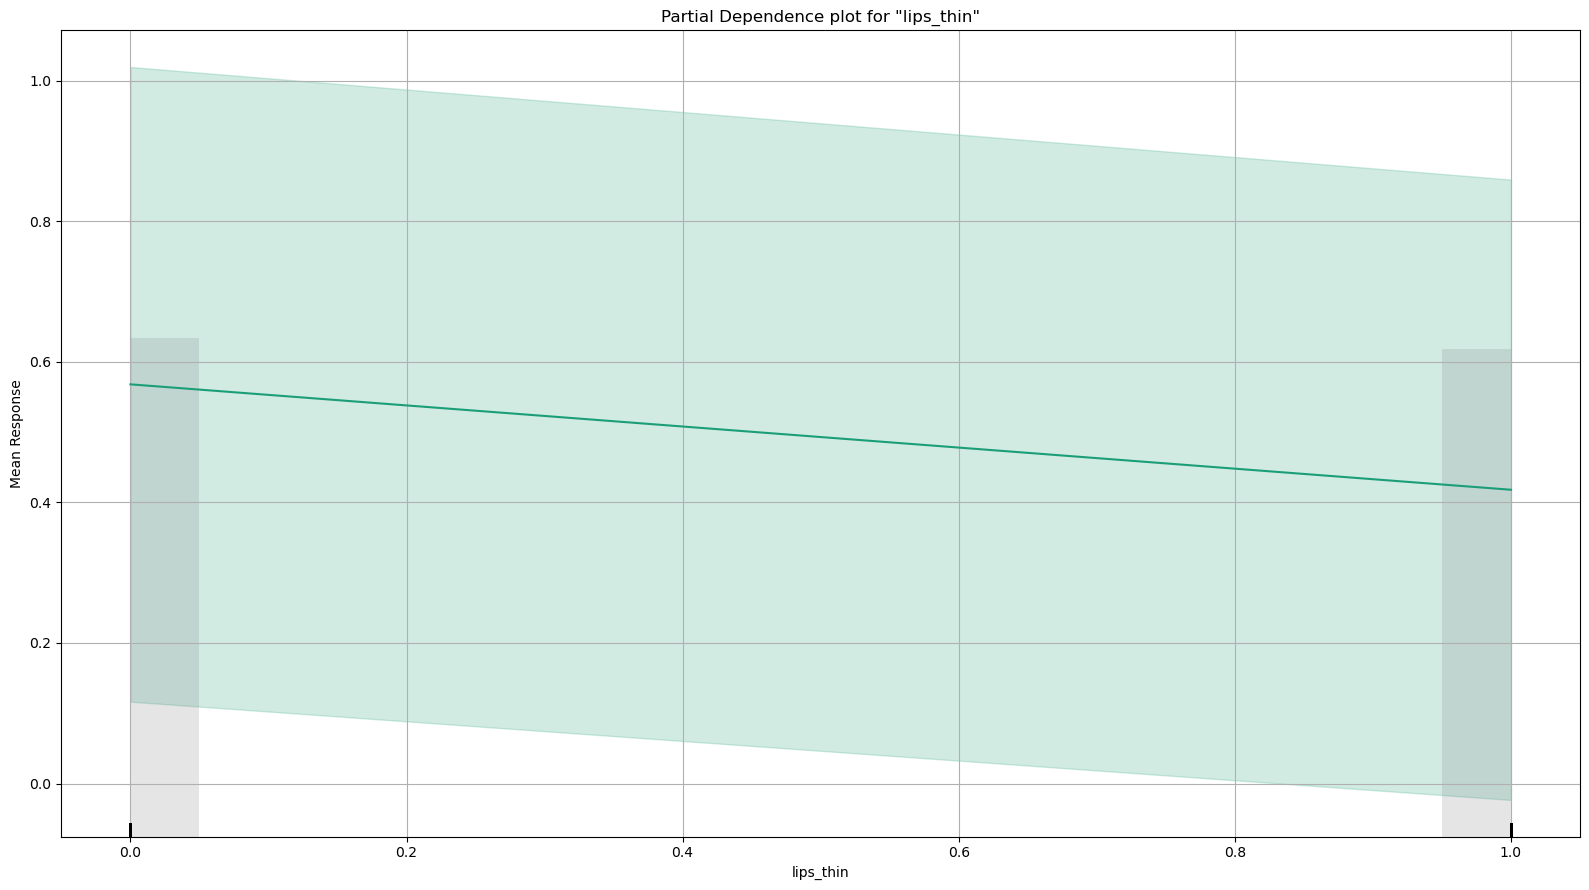

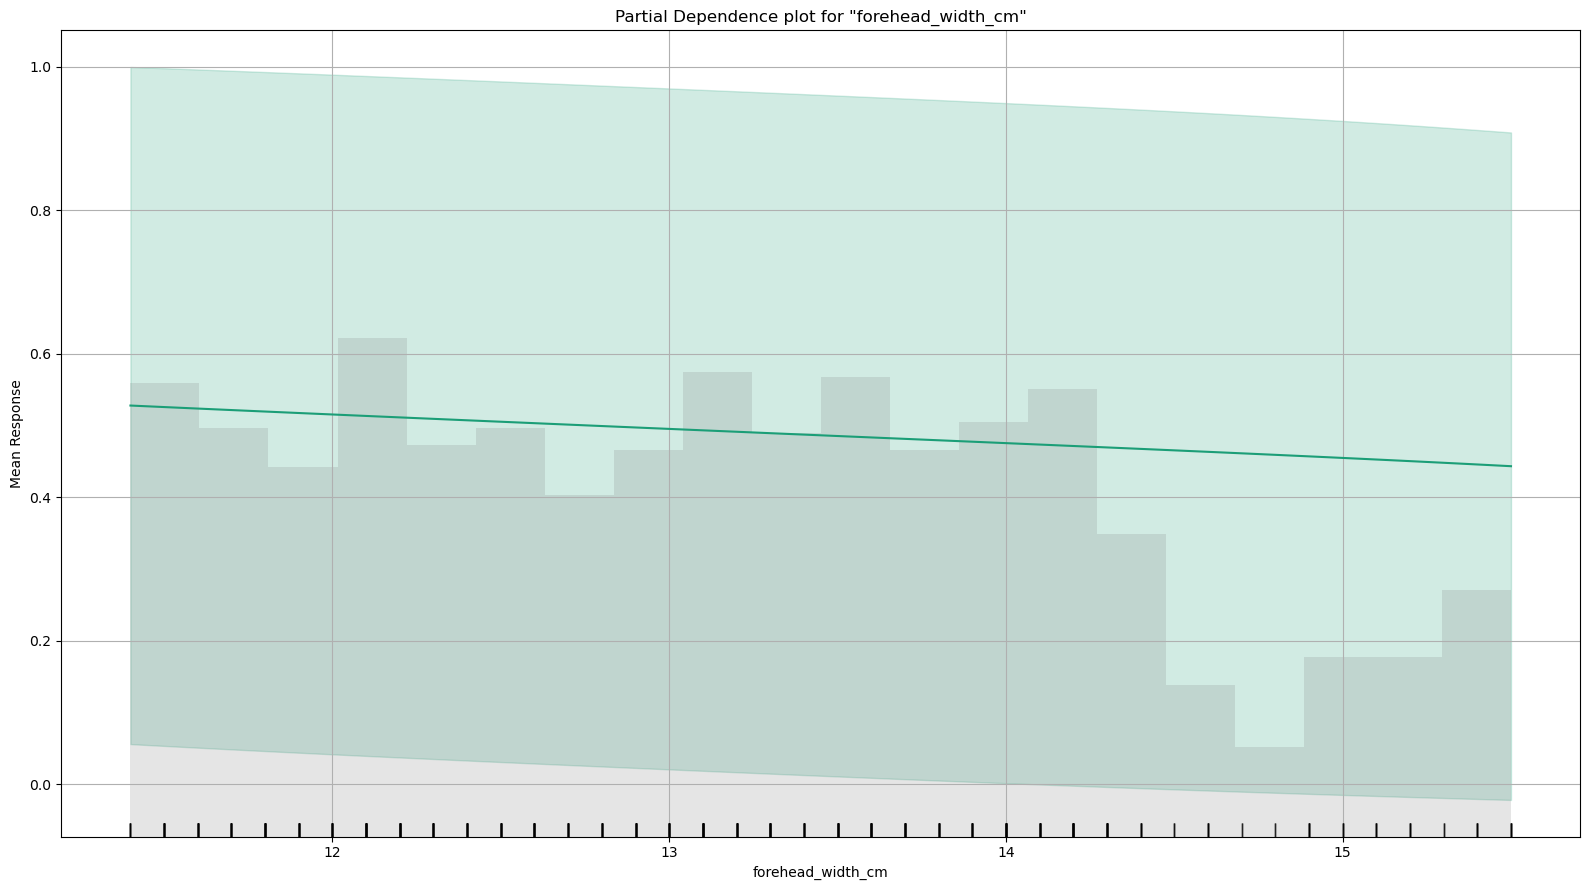

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20230323_94256

,football,futbol,Error,Rate
football,588.0,31.0,0.0501,(31.0/619.0)
futbol,6.0,622.0,0.0096,(6.0/628.0)
Total,594.0,653.0,0.0297,(37.0/1247.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [13]:
best_model_with_auc.explain(test)